# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [ ]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [ ]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [28]:
import requests
import os
api_key = "bc6b4f4aef1657c52ec0b2db77a62726"

# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?appid={api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if i % 50 == 0 and i >= 50:
        set_count += 1
        record_count = 1
        #sleep(5)
    # Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ", "+")
   # print(city_url)
    #break

    # Log the url, record, and set numbers
    print(f"Processing Record {record_count} of Set {set_count} | {city}")

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Send a GET request to the OpenWeatherMap API
        response = requests.get(city_url)

        # If the response is successful (status code 200), parse the JSON and retrieve data
        #if response.status_code == 200:
        city_weather = response.json()

            # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

            # Append the City information into city_data list
        city_data.append({
            "City": city,
            "Lat": city_lat,
            "Lng": city_lng,
            "Max Temp": city_max_temp,
            "Humidity": city_humidity,
            "Cloudiness": city_clouds,
            "Wind Speed": city_wind,
            "Country": city_country,
            "Date": city_date
        })

       # else:
            #print(f"Error: {response.status_code} - {response.content}")

    # If an error is experienced, skip the city
    except Exception as e:
        print(f"City not found. Skipping... Error: {str(e)}")
     
# Create the 'output_data' directory if it doesn't exist
output_directory = "output_data"
os.makedirs(output_directory, exist_ok=True)  
    
# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | invercargill
Processing Record 2 of Set 1 | rongelap
Processing Record 3 of Set 1 | port mathurin
Processing Record 4 of Set 1 | adamstown
Processing Record 5 of Set 1 | edinburgh of the seven seas
Processing Record 6 of Set 1 | klyuchi
Processing Record 7 of Set 1 | bethel
Processing Record 8 of Set 1 | bredasdorp
Processing Record 9 of Set 1 | iqaluit
Processing Record 10 of Set 1 | mangrol
Processing Record 11 of Set 1 | shahrak
Processing Record 12 of Set 1 | grytviken
Processing Record 13 of Set 1 | broome
Processing Record 14 of Set 1 | pozo alcon
Processing Record 15 of Set 1 | alta
Processing Record 16 of Set 1 | paseh
Processing Record 17 of Set 1 | tura
Processing Record 18 of Set 1 | susuman
Processing Record 19 of Set 1 | puerto natales
Processing Record 20 of Set 1 | iskateley
Processing Record 21 of Set 1 | saldanha
Processing Record 22 of Set 1 | ceelbuur
Processing Record 23 of Set 1 |

Processing Record 39 of Set 4 | art khwajah
Processing Record 40 of Set 4 | charters towers
Processing Record 41 of Set 4 | bonthe
Processing Record 42 of Set 4 | afaahiti
Processing Record 43 of Set 4 | la sarre
Processing Record 44 of Set 4 | portland
Processing Record 45 of Set 4 | andergrove
Processing Record 46 of Set 4 | antofagasta
Processing Record 47 of Set 4 | fuglafjordur
Processing Record 48 of Set 4 | vingt cinq
City not found. Skipping... Error: 'coord'
Processing Record 49 of Set 4 | newman
Processing Record 50 of Set 4 | maturin
Processing Record 1 of Set 5 | belfast
Processing Record 2 of Set 5 | papatowai
Processing Record 3 of Set 5 | port elizabeth
Processing Record 4 of Set 5 | florence
Processing Record 5 of Set 5 | saint-pierre
Processing Record 6 of Set 5 | naze
Processing Record 7 of Set 5 | east london
Processing Record 8 of Set 5 | enewetak
Processing Record 9 of Set 5 | jijiga
Processing Record 10 of Set 5 | tarauaca
Processing Record 11 of Set 5 | mananjary

Processing Record 32 of Set 8 | pinillos
Processing Record 33 of Set 8 | grootfontein
Processing Record 34 of Set 8 | vilyuysk
Processing Record 35 of Set 8 | prado
Processing Record 36 of Set 8 | bam
Processing Record 37 of Set 8 | new norfolk
Processing Record 38 of Set 8 | oualidia
City not found. Skipping... Error: 'coord'
Processing Record 39 of Set 8 | nesebar
Processing Record 40 of Set 8 | santa ana
Processing Record 41 of Set 8 | cullowhee
Processing Record 42 of Set 8 | puerto deseado
Processing Record 43 of Set 8 | mao
Processing Record 44 of Set 8 | kirakira
Processing Record 45 of Set 8 | jalapa
Processing Record 46 of Set 8 | khovd
Processing Record 47 of Set 8 | kilju
Processing Record 48 of Set 8 | kutum
Processing Record 49 of Set 8 | maru
Processing Record 50 of Set 8 | palikir - national government center
Processing Record 1 of Set 9 | kununurra
Processing Record 2 of Set 9 | burang
Processing Record 3 of Set 9 | khandyga
Processing Record 4 of Set 9 | labrador city


Processing Record 18 of Set 12 | mankoeng
Processing Record 19 of Set 12 | burgersdorp
Processing Record 20 of Set 12 | paris
Processing Record 21 of Set 12 | arauca
Processing Record 22 of Set 12 | holualoa
Processing Record 23 of Set 12 | guneysu
Processing Record 24 of Set 12 | whyalla norrie
City not found. Skipping... Error: 'coord'
Processing Record 25 of Set 12 | tadine
Processing Record 26 of Set 12 | hinton
Processing Record 27 of Set 12 | merizo village
Processing Record 28 of Set 12 | dongargarh
Processing Record 29 of Set 12 | dudinka
Processing Record 30 of Set 12 | ishigaki
Processing Record 31 of Set 12 | monywa
Processing Record 32 of Set 12 | argo
Processing Record 33 of Set 12 | mary
Processing Record 34 of Set 12 | bihariganj
Processing Record 35 of Set 12 | niederstetten
Processing Record 36 of Set 12 | callao
Processing Record 37 of Set 12 | tromso
Processing Record 38 of Set 12 | calingasta
Processing Record 39 of Set 12 | nanao
Processing Record 40 of Set 12 | ja

In [29]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          580
Lat           580
Lng           580
Max Temp      580
Humidity      580
Cloudiness    580
Wind Speed    580
Country       580
Date          580
dtype: int64

In [30]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,invercargill,-46.4000,168.3500,281.49,78,100,4.92,NZ,1696101349
1,rongelap,11.1635,166.8941,301.56,79,100,5.20,MH,1696101335
2,port mathurin,-19.6833,63.4167,296.21,78,16,10.88,MU,1696101355
3,adamstown,-25.0660,-130.1015,293.70,88,100,11.65,PN,1696101599
4,edinburgh of the seven seas,-37.0676,-12.3116,282.76,88,100,18.73,SH,1696101599


In [31]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [32]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,invercargill,-46.4000,168.3500,281.49,78,100,4.92,NZ,1696101349
1,rongelap,11.1635,166.8941,301.56,79,100,5.20,MH,1696101335
2,port mathurin,-19.6833,63.4167,296.21,78,16,10.88,MU,1696101355
3,adamstown,-25.0660,-130.1015,293.70,88,100,11.65,PN,1696101599
4,edinburgh of the seven seas,-37.0676,-12.3116,282.76,88,100,18.73,SH,1696101599


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

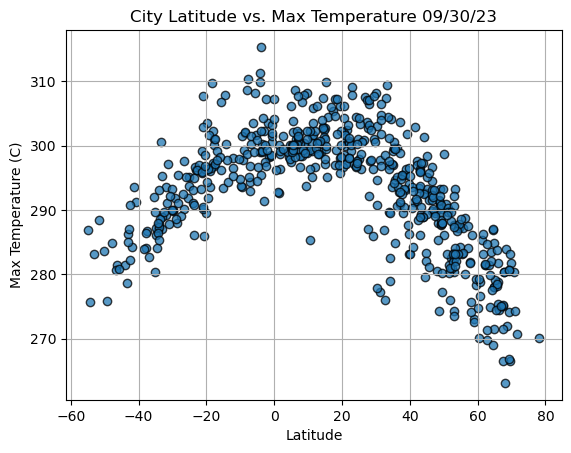

In [33]:
# Build scatter plot for latitude vs. temperature
latitudes = [data["Lat"] for data in city_data]
max_temps = [data["Max Temp"] for data in city_data]

# Build scatter plot for latitude vs. temperature
plt.scatter(latitudes, max_temps, edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature " + time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

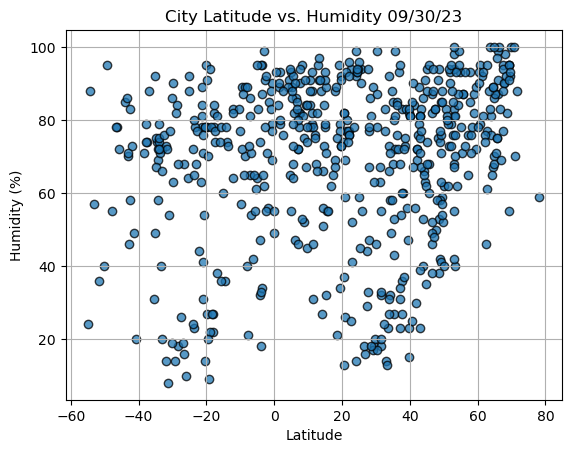

In [34]:
# Build the scatter plots for latitude vs. humidity
# Extract latitude and humidity data from city_data
latitudes = [data["Lat"] for data in city_data]
city_humidity = [data["Humidity"] for data in city_data]

# Build scatter plot for latitude vs. humidity
plt.scatter(latitudes, city_humidity, edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity " + time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

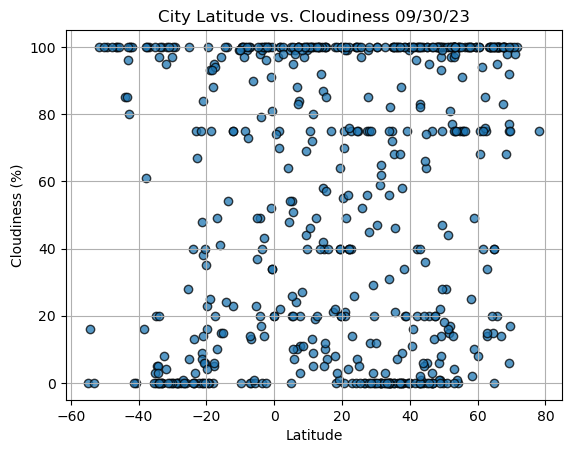

In [35]:
# Extract latitude and cloudiness data from city_data
latitudes = [data["Lat"] for data in city_data]
city_clouds = [data["Cloudiness"] for data in city_data]

# Build scatter plot for latitude vs. humidity
plt.scatter(latitudes, city_clouds, edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness " + time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

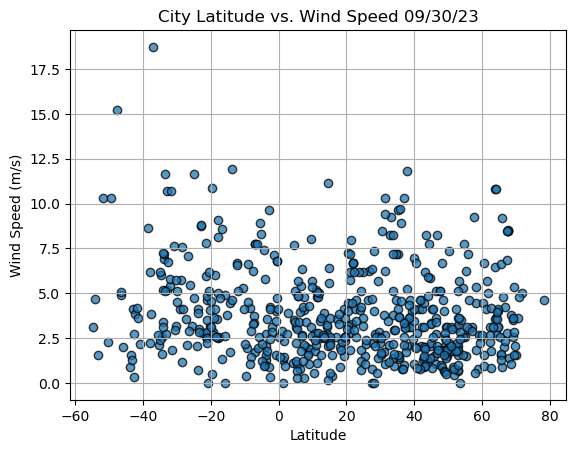

In [36]:
# Build the scatter plots for latitude vs. wind speed
latitudes = [data["Lat"] for data in city_data]
city_wind = [data["Wind Speed"] for data in city_data]

# Build scatter plot for latitude vs. humidity
plt.scatter(latitudes, city_wind, edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed " + time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [37]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
    # Compute linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.text(0.05, 0.9, line_eq, fontsize=12, color="red", transform=plt.gca().transAxes)
    plt.xlabel("Latitude")
    plt.ylabel(title)
    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [38]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,rongelap,11.1635,166.8941,301.56,79,100,5.20,MH,1696101335
5,klyuchi,52.2667,79.1667,282.46,79,97,3.08,RU,1696101600
6,bethel,41.3712,-73.4140,291.20,84,100,4.12,US,1696101600
8,iqaluit,63.7506,-68.5145,275.00,100,100,10.80,CA,1696101714
9,mangrol,21.1167,70.1167,300.64,77,49,5.71,IN,1696101714


In [39]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,invercargill,-46.4000,168.3500,281.49,78,100,4.92,NZ,1696101349
2,port mathurin,-19.6833,63.4167,296.21,78,16,10.88,MU,1696101355
3,adamstown,-25.0660,-130.1015,293.70,88,100,11.65,PN,1696101599
4,edinburgh of the seven seas,-37.0676,-12.3116,282.76,88,100,18.73,SH,1696101599
7,bredasdorp,-34.5322,20.0403,284.06,74,5,2.58,ZA,1696101601


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.6457029762616259


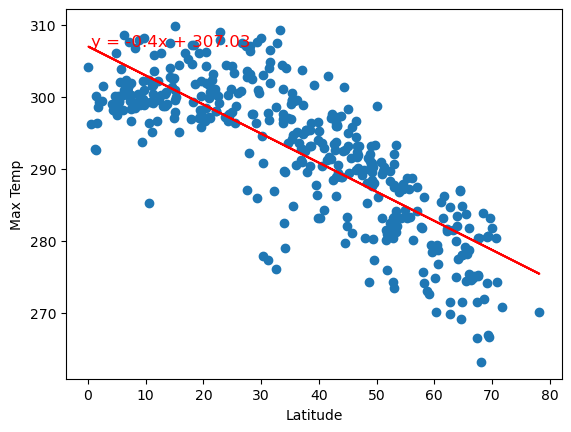

In [40]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp",(0,6))

The r-value is: 0.6266613485252851


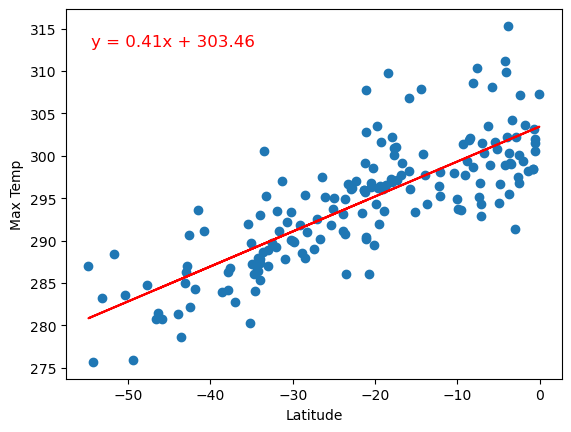

In [41]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp",(6,0))

**Discussion about the linear relationship:** There is ver strong correlation between the Max Temperature and latitude. The closer the latitude is to 0, the higher the Max Temp is. 

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.011675969476896919


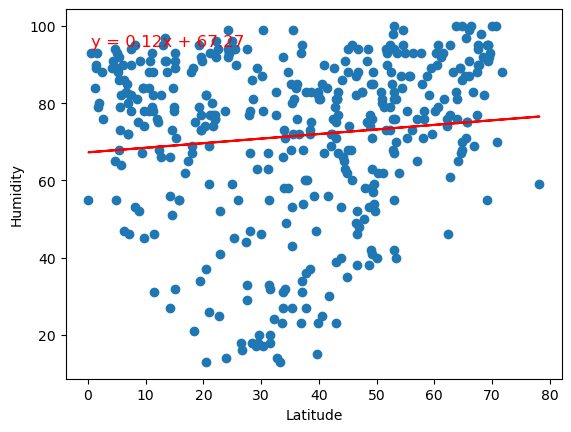

In [42]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity",(6,0))

The r-value is: 0.012094823588216584


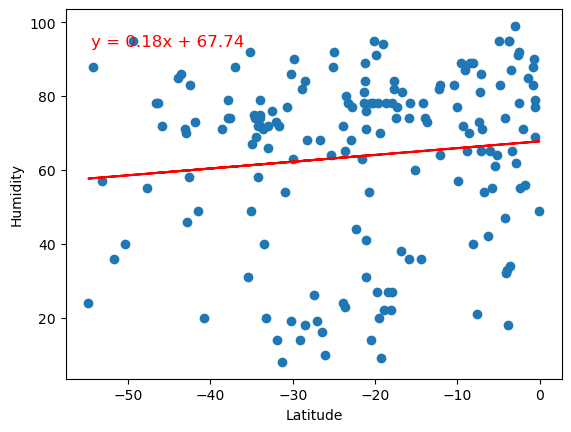

In [43]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity",(6,0))

**Discussion about the linear relationship:** both r-values are very close to zero and shows no correlation between humidity and latitude in both northern and southern hemisphere

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.010702101573684526


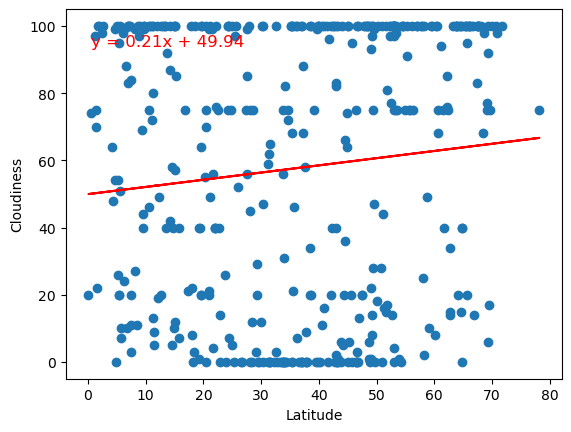

In [44]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness",(6,0))

The r-value is: 0.005199154063799586


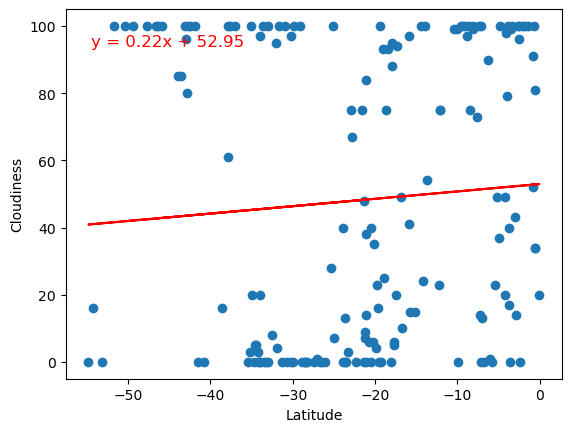

In [45]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness",(6,0))

**Discussion about the linear relationship:** both r-values are very close to zero and shows no correlation between cloudiness and latitude. in both northern and southern hemisphere

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.00340480034023442


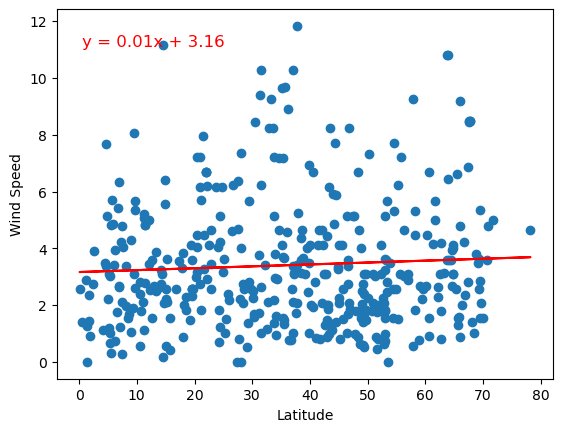

In [46]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed",(6,0))

The r-value is: 0.01790770381845982


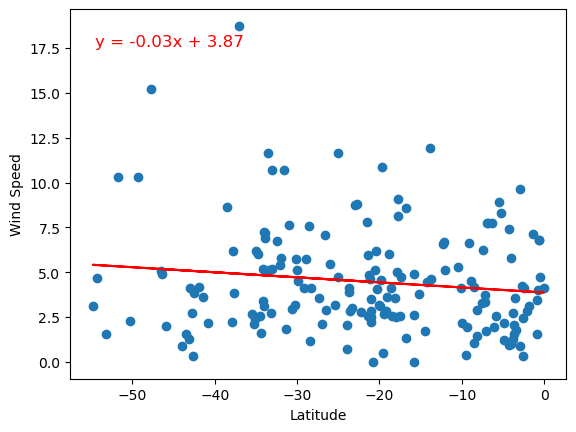

In [47]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed",(6,0))

**Discussion about the linear relationship:** the value in the southern hemisphereis very close to zero, indicating a lack of a substantial linear relationship between windspeed and latitude.